# Graph evaluation report
- Academic Year: 2019/20
- Faculty of Computing - Artificial Intelligence - Semester 2
- Full name and student id: Kacper Trębacz 145453
- Subject: Algorithms and Data Structures


This exercise consinst of two parts:
- evaluation of different graph representations in terms of peformance when searching for an existance of an edge between 2 vertices
- determining best representation for topoligical order sorting and evaluate the time needed to perform it

In [2]:
from random import randint,sample, randrange
import sys
import matplotlib.pyplot as plt
import numpy as np
import time 
import math
import random
import string
import copy
import pandas as pd
import json
import os
import multiprocessing as mp
sys.setrecursionlimit(10**9)
plt.rcParams['figure.figsize'] = (10.0, 6.0)

## Constants declaration

In [26]:

ADJACENCY_MATRIX = "Adjacency Matrix"
INCIDENCE_MATRIX = "Incidence Matrix"
EDGE_LIST = "Edge List"
LIST_OF_INCIDENTS = "List of Incidents"

## Edges count
Every graph should have saturation factor of 0.6 in Part 1 and 0.3 for Part 2

In [4]:
def edges_count(n):
    return int(n*(n-1)*0.6/2)

# Part 1

Firstly, we generate graphs with saturation factor 0.6 and save them to text files. There are 21 graphs of size from 2 to 2002 and 21 graphs of size from 2 to 202

In [5]:
def generate_and_write_to_file(n):
    array = np.zeros((n,n), dtype=bool)
    n_edges = edges_count(n)
    for i in range(n):
        array[i][i]=True
    for i in range(n_edges):
        x,y = randrange(n), randrange(n)
        while x==y or array[x][y]:
            x,y = randrange(n), randrange(n)
        array[x][y] = True
        array[y][x] = True
    os.makedirs("data", exist_ok= True)
    np.savetxt("data/"+str(n)+".txt", array, fmt="%5i")

In [6]:
for i in range(2,2003,100):
    generate_and_write_to_file(i)

In [7]:
for i in range(2,203,10):
    generate_and_write_to_file(i)

# Graph representations delaration

Here we delacre functions which convert graphs from text files to a given representation. We also define functions for each reporesentation that check if a given edge exists in graph.

### Adjacency Matrix

In [8]:
def convert_to_adjacency_matrix(n,array):
    return array

def find_edge_adjacency_matrix(array,v1,v2):
    return array[v1][v2]

### Incidence Matrix

In [9]:
def convert_to_incidence_matrix(n,array):
    m=edges_count(n)
    new_array = np.zeros((n,m), dtype=bool)
    a=0
    for i in range(n):
        for j in range(i+1,n):
            if array[i][j]:
                new_array[i][a] = True
                new_array[j][a] = True
                a+=1
    return new_array

def find_edge_incidence_matrix(array, v1, v2):
    return np.dot(array[v1], array[v2])

### Edge List

In [16]:
def convert_to_edge_list(n,array):
    m=edges_count(n)
    new_array = []
    for i in range(n):
        for j in range(i+1,n):
            if array[i][j]:
                new_array.append([i,j])
    return new_array

def find_edge_edge_list(array, v1, v2):
    for edges in array:
        if (edges[0] == v1 and edges[1] == v2) or (edges[0] == v2 and edges[1] == v1):
            return True
    return False

### List of Incidents

In [17]:
def convert_to_list_of_incidents(n,array):
    m=edges_count(n)
    incidents_list = []
    for i in range(n):
        incidents = []
        for j in range(n):
            if i !=j and array[i][j] == 1:
                incidents.append(j)
        incidents_list.append(incidents)
    return incidents_list

def find_edge_list_of_incidents(array, v1, v2):
    return v2 in array[v1]

Here we declare dictionaries that would let us perform tests easier

In [18]:
conversion_dictionary = {
    ADJACENCY_MATRIX : convert_to_adjacency_matrix,
    INCIDENCE_MATRIX : convert_to_incidence_matrix,
    EDGE_LIST : convert_to_edge_list,
    LIST_OF_INCIDENTS : convert_to_list_of_incidents
}

In [19]:
search_dictionary = {
    ADJACENCY_MATRIX : find_edge_adjacency_matrix,
    INCIDENCE_MATRIX : find_edge_incidence_matrix,
    EDGE_LIST : find_edge_edge_list,
    LIST_OF_INCIDENTS : find_edge_list_of_incidents
}

## Time measurement and tests functions

For graph of each size (n) we perform 100 search operations to see wheather a certain edge exists. We run test of each graph representation on a separate code in order too speed up computation

In [20]:
def measure_time(n,entry):
    array = np.loadtxt("data/"+str(n)+".txt", dtype=bool)
    graph = conversion_dictionary[entry](n,array)
    sum_of_times=0
    for i in range(2*n):
        x = randrange(n)
        y = randrange(n)
        while y == x:
            y = randrange(n)
        startTime = time.time()
        search_dictionary[entry](graph, x, y)
        sum_of_times += time.time() - startTime
    return sum_of_times/(2*n)

def plot_plot(X,Ys,labels,title):
    for i in range(len(Ys)):
        plt.plot(X,Ys[i],label=labels[i])
    plt.legend()
    plt.xlabel('Number of Elements')
    plt.ylabel('Time (s)')
    plt.title(title)
    plt.show()

def perform_test_single_entry(entry, X):
    return [measure_time(n, entry) for n in X]
    
def perform_tests(entries,maximum=2003,jump=100):
    X = [i for i in range(2,maximum, jump)]
    pool = mp.Pool(mp.cpu_count())
    Ys = pool.starmap(perform_test_single_entry,[(entry,X) for entry in entries])
    pool.terminate()
    plot_plot(X, Ys, entries, "Edge search time")
        

Firstly we run test for every representaion

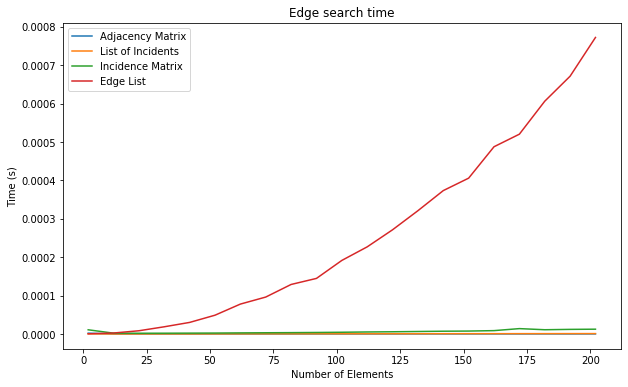

In [21]:
perform_tests([ADJACENCY_MATRIX, LIST_OF_INCIDENTS, INCIDENCE_MATRIX, EDGE_LIST],203,10)

Because 'List of Edges' was much slower than the others run next test without it

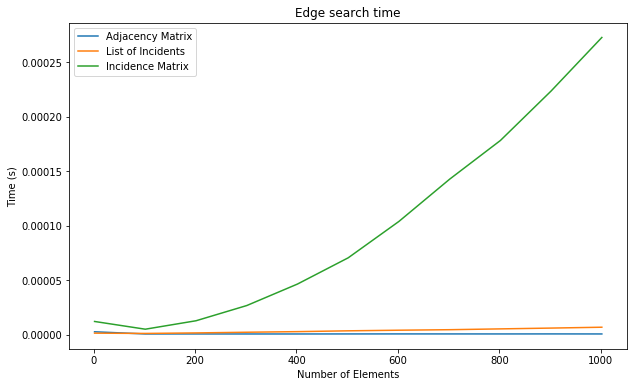

In [24]:
perform_tests([ADJACENCY_MATRIX, LIST_OF_INCIDENTS, INCIDENCE_MATRIX], 1003)

Finally, because Incidence Matrix was much slower than the other we run next test with just 'Adjacency Matrix' and 'List of Incidents'

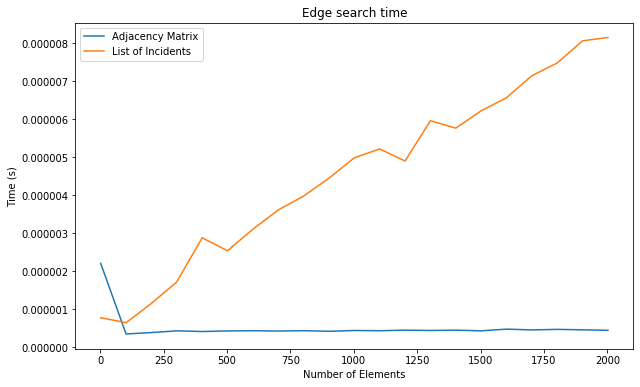

In [16]:
perform_tests([ADJACENCY_MATRIX, LIST_OF_INCIDENTS])

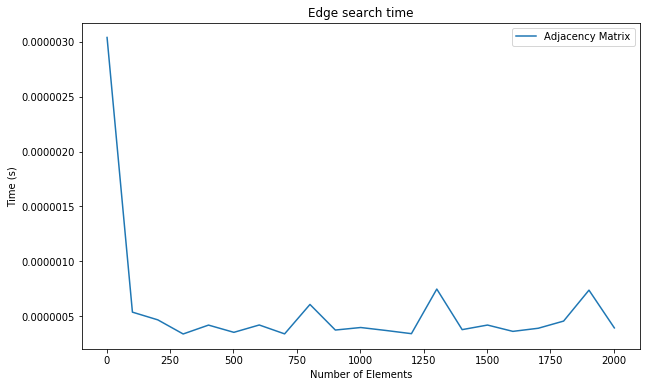

In [24]:
perform_tests([ADJACENCY_MATRIX])

# Part 2

In this part we are going to evaluate the efficiency of Topological Order Sort (TOS). We are going to use the 'List of Incidents' representation, because it is the most convinient for this task. It is due to the fact that it structurised in such a way that the TOS algorithm does not need to perform any transformations in order to use this representation. Although it is slower than 'Adjacency Matrix' when searching for an edge, it is more suitable, because if we used 'Adjacency Matrix' we would be creating 'List of Incidents' during operation of the algorithm. It would be a waist of resources.

Firstly we generate 21 graphs of size from 2 to 4002 with saturation factor 0.3 and save them in txt files

In [18]:
def generate_DAG_and_write_to_file(n):
    array = np.zeros((n,n), dtype=bool)
    n_edges = edges_count(n)
    for i in range(n_edges):
        x,y = randrange(n), randrange(n)
        while x>=y or array[x][y]:
            x,y = randrange(n), randrange(n)
        array[x][y] = True
    os.makedirs("data/DAG", exist_ok= True)
    np.savetxt("data/DAG/"+str(n)+".txt", array, fmt="%5i")

In [19]:
# for i in range(2,4003,200):
#     generate_DAG_and_write_to_file(i)

## Topological order sorting definition

In [20]:
def sort_topologically_recursive(ix, list_of_incidents, visited, stack):
    visited[ix] = True
    for j in list_of_incidents[ix]:
        if not visited[j]:
            sort_topologically_recursive(j,list_of_incidents, visited, stack)
    stack.append(ix)
def sort_topologically(n, list_of_incidents):
    visited = [False]*n
    stack = []
    for i in range(n):
        if not visited[i]:
            sort_topologically_recursive(i, list_of_incidents, visited,stack)
    return stack[::-1]
    

## Time measurement
For every graph of size (n) we measure time of performing TOS on it.

In [21]:
def measure_time_2(n):
    array = np.loadtxt("data/DAG/"+str(n)+".txt", dtype=bool)
    list_of_incidents = conversion_dictionary[LIST_OF_INCIDENTS](n,array)
    startTime = time.time()
    order = sort_topologically(n, list_of_incidents)
    processTime = time.time() - startTime
    return processTime

def perform_test():
    X = [i for i in range(2,4003, 200)]
    Ys = [[measure_time_2(n) for n in X]]
    plot_plot(X, Ys, ["Topological sort"], "Topological sort")

And we run the test

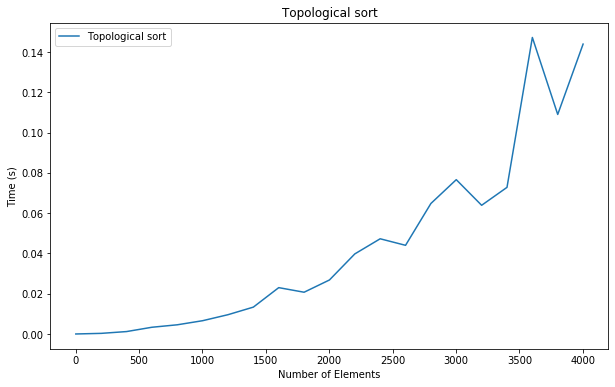

In [22]:
perform_test()

# Conclusions

## Part 1

We could clearly see hugde differences between each of graphs representations. They were so big that we needed to remove one of representations each time in order to compare others. For 2000 elements Edge list was much slower than Incidence Matrix, which was slower than 'List of Incidents'.

The best one was Adjacency Matrix which had constant search time O(1). List of incidents was slower because on average it woud search through n nodes in list and then through (n-1)*0.6/2 edges so it is O(n) (O(V + E/V)).

Almost the worst one was Incidence Matrix which needed to check whether there is an edge  on 2 arrays of size n(n-1)*0.6/2 edges so it complexity is O(E) which is same as Edge List. the key difference is that 'Incidence Matrix' is stored in an array of bits and 'Edge List' is stored as an list of numbers. Performing dot product operation on bits is much faster than comparing numbers in python's list. That is why it is so slow. If not for this fact, they would be nearly the same. From shapes of graphs we can still see that in both cases complexity is O(E) but it differs by a huge constant

## Part2

Theoretical complexity of topological sorting algorithm is O(E + V), where V is number of verticies (n in our case) and E is number of edges (n(n-1)*0.3/2 in our case) which gives O(n^2) complexity in our case. It is clearly visible in our graph. It is thanks to representation that we chose. As I wrote earlier this representation is better than the others, because it is straightforward to use by our algorithm. Every other represention would require us to do some transformations which would take additional time. In a setting where we would have almost none edges, edge list could be more efficient. If a graph had almost all edges than Adjacency matrix would be more efficient.